In [1]:
cd C:\Users\nm173399\Desktop

C:\Users\nm173399\Desktop


In [3]:
import numpy as np
import pandas as pd

In [69]:
ratings = np.array(pd.read_csv("Rating Zeros.csv", index_col=0)) # row: users  col: movies
labels = np.genfromtxt("labels.csv", delimiter=",", dtype=int) # cluster assignments from k-means

In [59]:
ratings

array([[5, 3, 4, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0]], dtype=int64)

In [70]:
labels

array([4, 0, 3, 3, 1, 2, 2, 1, 3, 2, 1, 1, 2, 1, 0, 1, 3, 2, 3, 3, 0, 1, 1,
       1, 1, 0, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 1, 1, 3, 3, 1, 4, 4, 1, 0, 3,
       3, 1, 1, 3, 3, 0, 0, 0, 3, 4, 0, 1, 2, 2, 3, 4, 0, 4, 1, 0, 0, 0, 0,
       1, 3, 1, 1, 3, 0, 3, 1, 3, 3, 3, 0, 1, 1, 0, 2, 3, 4, 3, 0, 2, 1, 4,
       3, 4, 4, 1, 1, 3, 0, 3, 0, 1, 3, 0, 3, 1, 3, 0, 4, 3, 3, 3, 3, 1, 1,
       3, 0, 1, 0, 0, 0, 3, 3, 3, 1, 3, 3, 1, 3, 4, 3, 3, 3, 3, 3, 3, 0, 1,
       3, 3, 0, 3, 3, 1, 4, 3, 3, 1, 3, 0, 2, 1, 3, 3, 3, 3, 0, 1, 0, 1, 3,
       0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 0, 1, 4, 3, 1, 0, 0, 3, 2,
       3, 0, 1, 1, 2, 0, 3, 3, 0, 2, 3, 3, 1, 1, 3, 4, 2, 3, 0, 3, 3, 3, 1,
       3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 4, 0, 3, 3, 3, 0, 3, 3, 1,
       3, 1, 1, 2, 1, 1, 1, 3, 2, 3, 3, 3, 3, 4, 3, 1, 3, 1, 4, 1, 0, 3, 1,
       1, 3, 4, 3, 3, 3, 3, 3, 1, 1, 1, 0, 3, 4, 4, 2, 1, 2, 1, 3, 0, 1, 4,
       0, 3, 4, 4, 3, 3, 1, 3, 3, 4, 0, 1, 3, 1, 4, 1, 2, 0, 4, 1, 1, 1, 2,
       3, 4,

### Randomize data and partitioning

In [71]:
from sklearn.cross_validation import train_test_split
r_train, r_test, target_train, target_test = train_test_split(ratings, labels, test_size=0.2, random_state=33)

print r_train.shape, r_test.shape
print r_test[0:5]

(754L, 1682L) (189L, 1682L)
[[0 0 0 ..., 0 0 0]
 [4 2 2 ..., 0 0 0]
 [4 0 0 ..., 0 0 0]
 [5 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [72]:
print target_train.shape, target_test.shape

(754L,) (189L,)


### Normalize Data

In [73]:
from sklearn import preprocessing

In [74]:
min_max_scaler = preprocessing.MinMaxScaler().fit(r_train)
train_norm = min_max_scaler.fit_transform(r_train)
test_norm = min_max_scaler.fit_transform(r_test)

C:\Users\nm173399\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\nm173399\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\nm173399\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [75]:
train_norm[0:5]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [76]:
test_norm[0:5]

array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0.8,  0.4,  0.4, ...,  0. ,  0. ,  0. ],
       [ 0.8,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

### KNN Classifier

In [77]:
def KNN_Classifier(instance, dat, label, k, measure):
    if measure == "euclidean":
        dists = np.sqrt(((dat-instance)**2).sum(axis=1))
    elif measure == "cosine":
        dat_norm = np.array([np.linalg.norm(dat[j]) for j in range(len(dat))])
        instance_norm = np.linalg.norm(instance)
        sims = np.dot(dat, instance)/(dat_norm*instance_norm)
        dists = 1 - sims
    idx = np.argsort(dists)
    neighbor_index = idx[:k]
    neighbor_record = dat[[neighbor_index]]
    labels = label[[neighbor_index]]
    final_class = np.bincount(labels)
    return np.argmax(final_class), idx[:k]

In [80]:
def Comp_Accuracy(testdata, testlabel, traindata, trainlabel, k, measure):
    correct = 0
    for i in range(testdata.shape[0]):
        pred_class = KNN_Classifier(testdata[i], traindata, trainlabel, k, measure)
        if pred_class[0] == testlabel[i]:
            correct += 1
    accuracy_rate = float(correct)/float(testdata.shape[0])
    return accuracy_rate

In [81]:
Comp_Accuracy(test_norm, target_test, train_norm, target_train, 5, "euclidean")

0.5291005291005291

In [85]:
euc_accuracy = []
for i in range(1, 21):
    result = Comp_Accuracy(test_norm, target_test, train_norm, target_train, i, "euclidean")
    euc_accuracy.append(result)
print euc_accuracy

[0.5873015873015873, 0.6507936507936508, 0.5661375661375662, 0.5767195767195767, 0.5291005291005291, 0.5396825396825397, 0.5291005291005291, 0.5396825396825397, 0.5185185185185185, 0.5185185185185185, 0.5079365079365079, 0.5132275132275133, 0.49206349206349204, 0.5132275132275133, 0.48148148148148145, 0.48677248677248675, 0.4656084656084656, 0.4708994708994709, 0.455026455026455, 0.455026455026455]


In [88]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

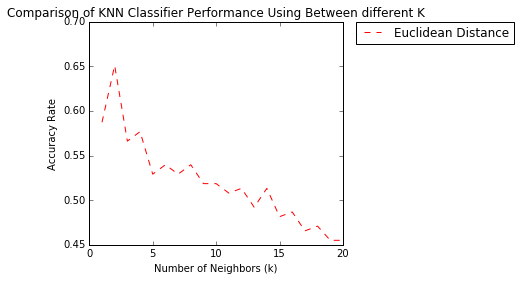

In [90]:
k = np.array(range(1, 21))
euc = np.array(euc_accuracy)
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Comparison of KNN Classifier Performance Using Between different K")
ax1.set_xlabel('Number of Neighbors (k)')
ax1.set_ylabel('Accuracy Rate')
plt.plot(k, euc, 'r--', label='Euclidean Distance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)